In [0]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.1.6


In [0]:
import numpy
print(numpy.__version__)

1.14.5


In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import utils

# 参数准备
batch_size = 128
epochs = 15
num_classes = 10

img_width = 28
img_height = 28
img_channels = 1

# 下载并读取MNIST数据集数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 分割验证集数据
valid_len = 5000
x_len = x_train.shape[0]
train_len = x_len-valid_len

# 验证集数据
x_valid = x_train[train_len:]
y_valid = y_train[train_len:]

# 训练集数据
x_train = x_train[:train_len]
y_train = y_train[:train_len]

# 将训练集、验证集和测试集数据进行图像转换，
# 图像的形状大小是 [batch, height, width, channels]
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, img_channels)
x_valid = x_valid.reshape(x_valid.shape[0], img_height, img_width, img_channels)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, img_channels)

# 将训练集、验证集和测试集数据都转换成float32类型
x_train = x_train.astype(np.float32)
x_valid = x_valid.astype(np.float32)
x_test = x_test.astype(np.float32)

# 将训练集、验证集和测试集数据都转换成0到1之间的数值，就是归一化处理
x_train /= 255
x_valid /= 255
x_test /= 255

# 通过to_categorical()函数将训练集标签、验证集标签和测试集标签独热编码（one-hot encoding）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 创建模型
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, img_channels)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# 模型架构预览
model.summary()

# 编译模型
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
          verbose=1, validation_data=(x_valid, y_valid))

# 评估模型
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {:.5f}, Test Accuracy: {:.5f}".format(score[0], score[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

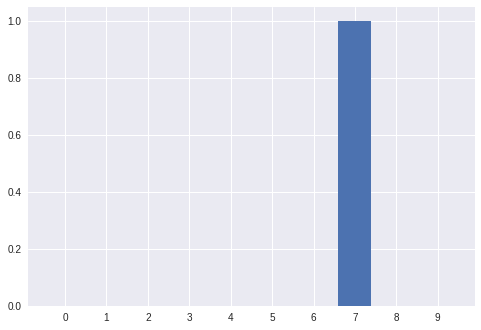

In [0]:
# 单张图像预测
import matplotlib.pyplot as plt

# 取出第一张图像
x_img = x_test[0:1]
# 通过模型预测
prediction = model.predict(x_img)

# 绘制图展示
x_coordinate = np.arange(prediction.shape[1])
plt.bar(x_coordinate, prediction[0][:])
plt.xticks(x_coordinate, np.arange(10))
plt.show()

In [0]:
print("预测的图中的数字是{}。".format(y_test[0:1]))

预测的图中的数字是[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]。
